### By Amon Johnson and Francisco Teon

List five interesting unexplained observations from the anomaly detection or any other project related assignment on your dataset and frame each as a question “Why was X observed?”. For each unexplained observation, list three hypotheses for what could be happening.

Select one interesting unexplained observation per group member and do the following...

Create a notebook called investigations.ipynb. Each group member must then investigate one unexplained observation, test the accompanying hypothesis, and generate more if needed. Write the findings in the investigations notebook and explain your procedure, findings, and any other interesting observations in a single paragraph. Also include accompanying code, stats, plots, or any other information to support an explanation. Additionally, include the name of the group member that worked on each investigation.


Anomaly: An anomaly we observed was one that claims to be released in the year 1970 for the xbox 360 which was not in production for that year.

Hypothesis:
1. It could be due to a typo
2. could have potentially been set due to a glitch
3. Could have hapenned due to a misunderstanding in the date format before the data was "cleaned"

Anomaly: Another anomaly we observed is that some games that are in different consoles are not listed with the same genre, for example Mario Bros. for the NES is labeled as Platformer game while the Wii version is labeled as action.

Hypothesis:
1. because of different platforms the way in which a game is played coudld be different hence changing the genre.
2. Input error
3. differing sources in which they gathered the data.


Anomaly: We also have data entries of the same game with the same platform and with the same release date which can inflate the score of a singular game.

Hypothesis:
1. there are just duplicates
2. Data was not properly cleaned
3. Error in data entry

Anomaly: We also have various anomalies detected with various games having really low scores.

Hypothesis:
1. They can be anomalous because they are too low of a score compared to the rest of the scores in the same genre.
2. some games could have had lower scores compared to others because the lack of reviews given or players compared to other games
3.  They could be really low scores for potentially the same game just different platforms

Anomaly: Various games that were consecutively listed in the dataset and are both high scores and low scores but no average scores.

Hypothesis:
1. could have been detected as anomolous because they were all games that have the same title leading to potential inflation of scores for the game.
2. Could be flagged as an anomally due to duplication.
3. Could have been detected as anomalous due to the radical difference in scores as some may be too high or too low for the platform, genre, and year being released.

In [67]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [70]:
# Load Dataset
ign_df= pd.read_csv('ign.csv')

# Display the first few rows of the dataset
ign_df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25
...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,Action,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,Action,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,Racing,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,Action,1998,10,29


In [71]:
#encode genre column to fit into the algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ign_df['genre'] = le.fit_transform(ign_df['genre'])


In [72]:
ign_df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,80,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,6,2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,75,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,1,2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,1,2008,4,25
...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,0,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,0,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,80,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,0,1998,10,29


# Francisco Teon
Why were various games that were consecutively listed in the dataset and are both high scores and low scores detected as anomalous observed?

As you can see in the anomaly detection output below a lot of the data point detected as anomalous are listed consecutively, for example, you have index 7, 8, 9, 10, 9, 10, 11, 12, 13, 14, 15, 16 listed all as anomalous.  

In [73]:
# Function to detect anomalies using Isolation Forest
def detect_anomalies_isolation_forest(data):
    iso_forest = IsolationForest(contamination=0.05)
    preds = iso_forest.fit_predict(data)
    anomalies = data[preds == -1]
    return anomalies

# Detect anomalies using Isolation Forest
anomalies_if = detect_anomalies_isolation_forest(attributes)

# Display potential anomalies
print("Potential Anomalies Detected (Isolation Forest):")
print(anomalies_if)
anomalies_if

Potential Anomalies Detected (Isolation Forest):
       score  genre  release_year
1       10.0      6          2011
7       10.0      1          2013
8       10.0      1          2013
9       10.0      1          2014
10      10.0      1          2014
...      ...    ...           ...
18620    1.0      0          1997
18621    1.0      0          2001
18622    0.8     80          2009
18623    0.7      0          1998
18624    0.5     80          2003

[931 rows x 3 columns]


,score,genre,release_year
1,10.0,6,2011
7,10.0,1,2013
8,10.0,1,2013
9,10.0,1,2014
10,10.0,1,2014
...,...,...,...
18620,1.0,0,1997
18621,1.0,0,2001
18622,0.8,80,2009
18623,0.7,0,1998


Hypothesis 1: It could have been detected as anomolous because they were all games that have the same title leading to potential inflation of scores for the game.

Originally I though that this anomally could have been detected due to the titles of the games being the same which can lead to inflated scores, if you looked for the score of a certain game since there are 12 games with the same title the score for the singular game will be inflated. As you can see with the data set above index 3 and 4 are anomalous these games are both named 'Grand theft auto IV', similarly indexes 7, 8, 9, 10, 9, 10, 11, 12, 13, 14, 15, 16 listed above as anomalous aalso have the same title 'Grand Theft Auto V'. You can also see this phenomenon happen with indexes 21 to 24 which are all named 'Metal Gear Solid V: The Phantom Pain'. Unfortunately the further you go down the anomaly list you will start to see singular index numbers like 59 or 69 which are not titled multiple times. This breaks that pattern and although this may be the reason some of the anomalies have been detected we cannot be sure.

In [8]:
#view the full dataset
ign_df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,80,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,6,2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,75,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,1,2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,1,2008,4,25
...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,0,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,0,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,80,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,0,1998,10,29


hypothesis 2: It could have been flagged as an anomally due to duplication.

I also thought that these points could have been detected because of duplication as you can see a lot of the games have the same information like the release dates, genres, titles, scores, and score phrases. But if you notice all of the games are listed as different platforms which destroy the possibility of them being considered duplicates because even a slight typo from the list will make a point not a duplicate.

In [33]:
ign_df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,80,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,6,2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,75,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,1,2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,1,2008,4,25
...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,0,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,0,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,80,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,0,1998,10,29


Hypothesis 3: These anomalies could have been detected due to the radical difference in scores as some may be too high or too low for the platform and genre.

As investigated below the average score for games in the Wii platform come out to be 6.299 out of 10, games such as Chrono trigger, index 1, is a Wii game and is also listed as an anomaly which could be due to such a high score for the platform based on the average game score for the Wii. Similarly 'action girlz racing' index 18622 was also listed as an anomaly and is also a Wii game that got a score of 0.8 which is too low to the average score of all Wii games. In the PC platform we can see this phenonmenon happened as well. Looking at the average score of 7.334 for PC games a score of 10 would be seen as anomalous as is the case for index 11, 'Grand Theft Auto V', although it is not surprising that this game would get such a high score compared to the Platform it is on it would be considered as too high of a score for a PC game. Again the game Indexed as 18239 'Jekyll and Hyde[2001]' was also detected as an anomaly for having such a low score compared to the platform average as you can see in the scatterplot being the second point on top of the scores for the PC platform plot. This is most likely the reason why these points got detected as an anomaly.

In [10]:
le = LabelEncoder()
ign_df['platform'] = le.fit_transform(ign_df['platform'])

In [17]:
#print the average score for the platform Wii
wii_df = ign_df[ign_df['platform'] == 46]
wii_df['score'].mean()

6.299267935578331

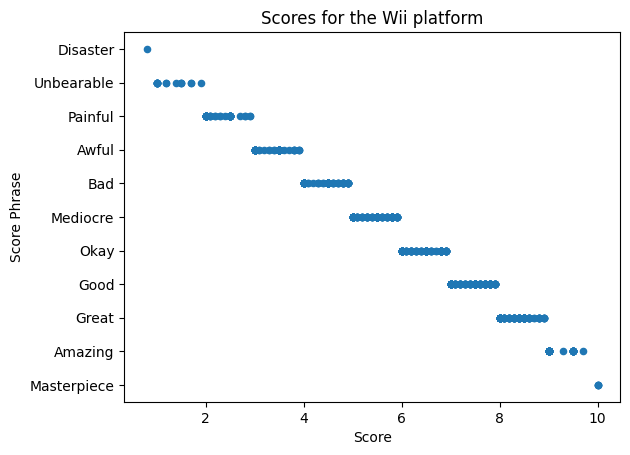

In [46]:
#plot the average score for the platform wii
import matplotlib.pyplot as plt
wii_df.plot(kind='scatter', x='score', y='score_phrase')
plt.xlabel('Score')
plt.ylabel('Score Phrase')
plt.title('Scores for the Wii platform')
plt.show()


In [36]:
#print all the scores for the wii platform
wii_df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
1,Chrono Trigger,10.0,Masterpiece,46,6,2011,5,25
39,Super Mario Galaxy 2,10.0,Masterpiece,46,63,2010,5,20
44,The Legend of Zelda: Ocarina of Time,10.0,Masterpiece,46,1,2007,2,26
47,The Legend of Zelda: Skyward Sword,10.0,Masterpiece,46,1,2011,11,11
104,Super Mario Galaxy,9.7,Amazing,46,63,2007,11,7
...,...,...,...,...,...,...,...,...
18608,London Taxi: Rush Hour,1.0,Unbearable,46,80,2008,2,29
18610,Monster Trux Arenas -- Special Edition,1.0,Unbearable,46,80,2008,2,6
18614,Offroad Extreme -- Special Edition,1.0,Unbearable,46,80,2007,12,10
18619,Step Up,1.0,Unbearable,46,93,2011,11,10


In [23]:
game_df = ign_df[(ign_df['genre'] == 1) & (ign_df['platform'] == 29)]
game_df['score'].mean()

7.334745762711864

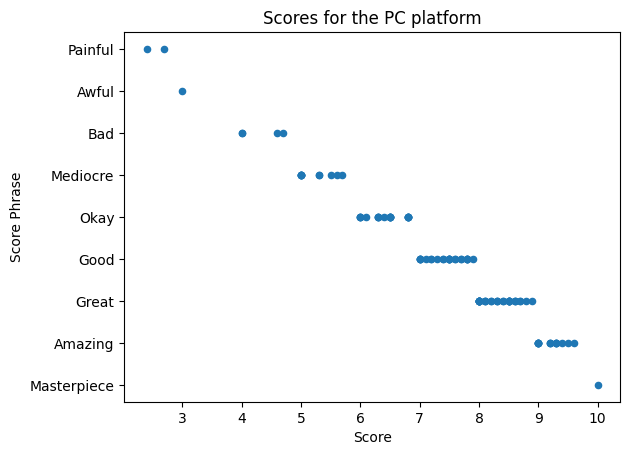

In [48]:
#plot the average score for the platform PC
game_df.plot(kind='scatter', x='score', y='score_phrase')
plt.xlabel('Score')
plt.ylabel('Score Phrase')
plt.title('Scores for the PC platform')
plt.show()

In [35]:
game_df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
11,Grand Theft Auto V,10.0,Masterpiece,29,1,2015,4,14
147,Tom Clancy's Splinter Cell Chaos Theory,9.6,Amazing,29,1,2005,3,23
366,Tom Clancy's Splinter Cell Pandora Tomorrow,9.5,Amazing,29,1,2004,3,26
427,Grand Theft Auto III,9.4,Amazing,29,1,2002,5,27
550,Grand Theft Auto: San Andreas,9.3,Amazing,29,1,2005,6,7
...,...,...,...,...,...,...,...,...
17447,Swashbucklers: Blue vs. Grey,4.0,Bad,29,1,2007,11,28
17466,The First Templar,4.0,Bad,29,1,2011,5,24
18169,The History Channel: Lost Worlds,3.0,Awful,29,1,2008,3,4
18239,Jekyll & Hyde [2001],2.7,Painful,29,1,2002,2,15


# Amon Johnson

Why do we have various anomalies detected with various games having really low scores being observed?


In [34]:
# Select the attributes for anomaly detection
attributes = ign_df[['score', 'genre', 'release_year']]

# Function to calculate Z-Scores and identify anomalies
def detect_anomalies_zscore(data, threshold=3):
    anomalies = {}
    for col in data.columns:
        mean = np.mean(data[col])
        std_dev = np.std(data[col])
        z_scores = [(x - mean) / std_dev for x in data[col]]
        anomalies[col] = [data[col][i] for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]
    return anomalies

# Detect anomalies
anomalies = detect_anomalies_zscore(attributes)


In [6]:
for col, values in anomalies.items():
    print(f"\nAnomalies in {col}:")
    for value in values:
        print(value)


Anomalies in score:
1.8
1.7
1.7
1.7
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.4
1.3
1.2
1.2
1.2
1.2
1.1
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.7
0.5

Anomalies in genre:

Anomalies in release_year:
1970


Hypothsis 1: Some games could have had lower scores compared to others because the lack of reviews given or players compared to other games.

Although we lack the data for the amount of reviews given per game it is completely possible that games were given less reviews making their average higher or lower depending on the amount of reviews and scores given.

In [50]:
anomalies

{'score': [1.8,
  1.7,
  1.7,
  1.7,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.4,
  1.3,
  1.2,
  1.2,
  1.2,
  1.2,
  1.1,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8,
  0.7,
  0.5],
 'genre': [],
 'release_year': [1970]}

In [52]:
#print the lowest scores
ign_df.sort_values(by='score', ascending=True).head(20)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
18624,Looney Tunes: Back in Action: Zany Race,0.5,Disaster,Wireless,Racing,2003,10,28
18623,Extreme PaintBrawl,0.7,Disaster,PC,Action,1998,10,29
18622,Action Girlz Racing,0.8,Disaster,Wii,Racing,2009,2,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,Action,2001,4,6
18602,High Rollers Casino,1.0,Unbearable,PlayStation 2,Casino,2004,11,23
18601,High Rollers Casino,1.0,Unbearable,Xbox,Casino,2004,11,23
18600,Fury of The Hulk,1.0,Unbearable,Wireless,Puzzle,2003,7,14
18599,Freestyle Boardin' '99,1.0,Unbearable,PlayStation,Sports,1999,3,23
18598,Fantasy Aquarium,1.0,Unbearable,Nintendo DS,Simulation,2008,4,21
18597,Fantastic Four,1.0,Unbearable,PlayStation,Action,1997,8,29


Hypothesis 2: They could be really low scores for potentially the same game just different platforms.

This could have been the issue but unfortuanately we found that some of the games in this anomaly list are only list once with inly one platform and the ones with the same name or even sequals had really low score as well so it would not be considered an anomaly.

In [62]:
#prit all games that have similar titles
ign_df[ign_df['title'].str.contains('Looney Tunes: Back in Action: Zany Race')]

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
18624,Looney Tunes: Back in Action: Zany Race,0.5,Disaster,Wireless,Racing,2003,10,28


In [61]:
ign_df[ign_df['title'].str.contains('Extreme PaintBrawl')]

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
17178,Extreme PaintBrawl 4,4.0,Bad,PC,Shooter,2002,6,12
18244,Extreme PaintBrawl 2,2.6,Painful,PC,Action,2000,2,10
18623,Extreme PaintBrawl,0.7,Disaster,PC,Action,1998,10,29


Hypothesis 3:They can be anomalous because they are too low of a score compared to the rest of the scores in the same genre.

The lowest scores were listed as anomalous as you can see from printing the lowest scores it matches perfectly to the anomaly detectetion list above. Also if you get the average score of the genres in which these anomalous point are listed as they are significantly different, for example, the lowest scored game is 'Looney Tunes: Back in Action: Zany Race' with a score of 0.5 and is in the racing genre which has an average score of 6.73 which is no wonder it is anomalous comapred to the rest of the genre. This anomaly becomes more clear looking at the Racing genre scatter plot which the two points in the disaster category are the 'Looney Tunes: Back in Action: Zany Race' and "Action girlz racing which are both listed as anomalous because of how low their scores were compared to their respective genre.

In [74]:
#what is the average score for the Racing genre
average = ign_df[ign_df['genre'] == 80]
average['score'].mean()

6.730618892508144

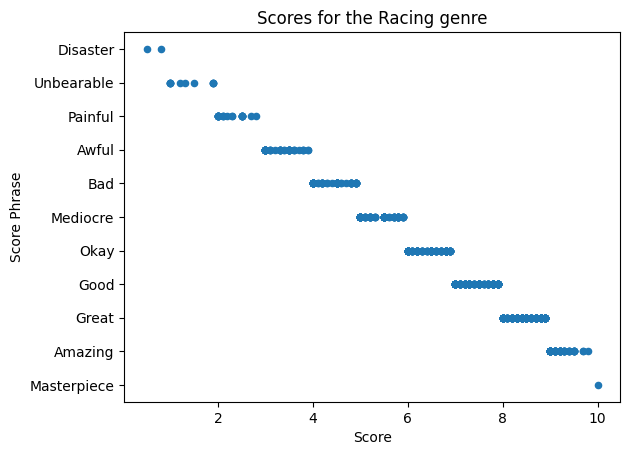

In [75]:
#plot the racing scores in a scatter plot
average.plot(kind='scatter', x='score', y='score_phrase')
plt.xlabel('Score')
plt.ylabel('Score Phrase')
plt.title('Scores for the Racing genre')
plt.show()

In [76]:
Action_average = ign_df[ign_df['genre'] == 1]
Action_average['score'].mean()

7.371895424836601

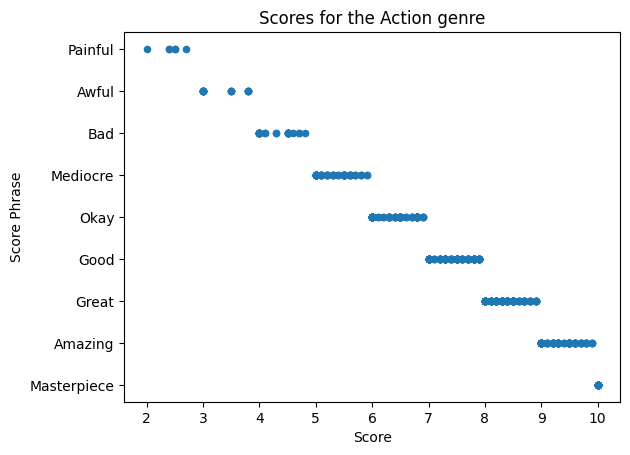

In [77]:
#plot the racing scores in a scatter plot
Action_average.plot(kind='scatter', x='score', y='score_phrase')
plt.xlabel('Score')
plt.ylabel('Score Phrase')
plt.title('Scores for the Action genre')
plt.show()